In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import integrate
import os

C:\Users\Youss\AppData\Local\Temp\ipykernel_2120\3419129628.py:12: RuntimeWarning: divide by zero encountered in divide
  disPotential = (-A / (6*r))*(R/2)


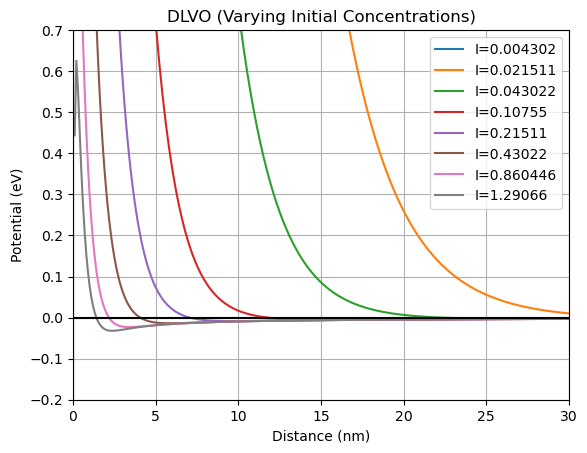

[0.13363312134776706, 0.298819689201273, 0.4225948571725534, 0.6681656067388353, 0.944950827579644, 1.3363622761388125, 1.889908244456719, 2.3146473595908135]
The B2 Coefficient for I=0.004302 is: 113.62400574125957
The b2 Coefficient for I=0.004302 is: 1453.4965091003855
The B2 Coefficient for I=0.021511 is: 6.9934723796466
The b2 Coefficient for I=0.021511 is: 89.46162057913745
The B2 Coefficient for I=0.043022 is: 2.1350309851714706
The b2 Coefficient for I=0.043022 is: 27.311658865772785
The B2 Coefficient for I=0.10755 is: 0.4482418703571555
The b2 Coefficient for I=0.10755 is: 5.733981912945104
The B2 Coefficient for I=0.21511 is: 0.14094702894932096
The b2 Coefficient for I=0.21511 is: 1.8030170051601804
The B2 Coefficient for I=0.43022 is: -5714162944.086864
The b2 Coefficient for I=0.43022 is: -73096489051.56587
The B2 Coefficient for I=0.860446 is: -3.834706502320805e+17
The b2 Coefficient for I=0.860446 is: -4.905418074451749e+18
The B2 Coefficient for I=1.29066 is: -1428542

C:\Users\Youss\AppData\Local\Temp\ipykernel_2120\3419129628.py:53: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  B2_result, _ = integrate.quad(integrand, .1, np.inf, args=(I,))
C:\Users\Youss\AppData\Local\Temp\ipykernel_2120\3419129628.py:53: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  B2_result, _ = integrate.quad(integrand, .1, np.inf, args=(I,))


' \nfor I in I_values:\n    # Compute y values\n    y = integrand(r, I)\n\n    # Perform trapezoidal integration\n    B2_result = np.trapz(y, r)\n    B2.append(B2_result)\n    print(f"The B2 Coefficient for I={I} is: {B2_result / 10000}")\n\n    b2_result = (B2_result * 3) / (16 * np.pi * R ** 3)\n    b2.append(b2_result)\n    print(f"The b2 Coefficient for I={I} is: {b2_result}")\n'

In [25]:
#Graph 1, PbS Sn2S6, in NMF 7.2nm with concentrations 1, 5, 10, 25, 50, 100, 200, 300
pi = np.pi
kb = 8.617E-5  # Boltzmann constant
A = 0.311
T = 298  # 25C
R = 3.6
Erel = 169.76  # NMF
k_values = []
#Calculating the Net potential function
def calc_totPotential(r, I):
    # Distribution Potential
    disPotential = (-A / (6*r))*(R/2) 
    
    # Electrostatic Potential
    k = ((0.055263 * Erel * kb * T) / I)**(-1/2)
    y = 1
    k_values.append(k)
    esPotential = (((32.0 * pi * kb * T * R * y**2) / (k**2)) * np.exp(-k * r))
    
    #Steric Potential
    #stPotential = np.exp(-r)

    totPotential = disPotential + esPotential #+ esPotential
    return totPotential

I_values = np.array([0.004302, 0.021511, 0.043022, 0.10755, 0.21511, 0.43022, 0.860446, 1.29066])  # Array of I values
#r =np.concatenate((np.linspace(.01, 1, 500, endpoint=False), np.linspace(1, 100, 500)))
r= np.linspace(0, 100, 1000)

# Plotting the DLVO graph
for I in I_values:
    net_potentials = calc_totPotential(r, I)
    plt.plot(r, net_potentials, label=f'I={I}')

plt.xlabel('Distance (nm)')
plt.ylabel('Potential (eV)')
plt.title('DLVO (Varying Initial Concentrations)')
plt.axhline(0, color='black', linewidth=1.5)
plt.axvline(0, color='black', linewidth=1.5)
plt.grid(True)
plt.xlim(0, 30)
plt.ylim(-.20, .7)
plt.legend()
plt.show()

#Integration for B2
def integrand(r, I):
    return ((-2*np.pi*(np.exp(-calc_totPotential(r, I)/(kb*T))-1))*r**2)
B2 = []
b2 = []
print (k_values)
for I in I_values:
    B2_result, _ = integrate.quad(integrand, .1, np.inf, args=(I,))
    B2.append(B2_result)
    print(f"The B2 Coefficient for I={I} is: {B2_result/10000}")
    b2_result = (B2_result*3)/(16*np.pi*R**3)
    b2.append(b2_result)
    print(f"The b2 Coefficient for I={I} is: {b2_result}")
""" 
for I in I_values:
    # Compute y values
    y = integrand(r, I)

    # Perform trapezoidal integration
    B2_result = np.trapz(y, r)
    B2.append(B2_result)
    print(f"The B2 Coefficient for I={I} is: {B2_result / 10000}")

    b2_result = (B2_result * 3) / (16 * np.pi * R ** 3)
    b2.append(b2_result)
    print(f"The b2 Coefficient for I={I} is: {b2_result}")
"""

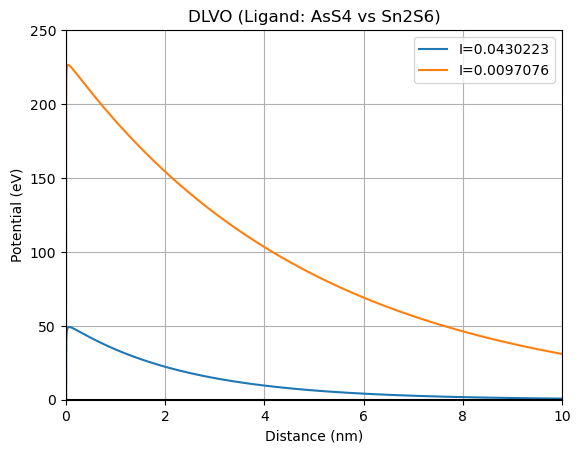

[0.4225963305842514, 0.20074042813675547]
The B2 Coefficient for I=0.0430223 is: 2.1335213567341373
The b2 Coefficient for I=0.0430223 is: 27.292347456626555
The B2 Coefficient for I=0.0097076 is: 27.659273405557474
The b2 Coefficient for I=0.0097076 is: 353.82186252770333


C:\Users\Youss\AppData\Local\Temp\ipykernel_1880\2355931527.py:58: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  B2_result, _ = integrate.quad(integrand, .01, np.inf, args=(I,))


In [43]:
# Graph 2, PbS Sn2S6 and Pb AsS4, in NMF 7.2nm concentration 10mg/ml
pi = np.pi
kb = 8.617E-5  # Boltzmann constant
A = 0.311
T = 298  # 25C
R = 3.6
Erel = 169.76  # NMF
k_values = []
#Calculating the Net potential function
def calc_totPotential(r, I):
    # Distribution Potential
    disPotential = (-A / (6*r))*(R/2) 

    # Electrostatic Potential
    k = ((0.055263 * Erel * kb * T) / I)**(-1/2)
    y = 1
    k_values.append(k)
    esPotential = (((32.0 * pi * kb * T * R * y**2) / (k**2)) * np.exp(-k * r))
    totPotential = disPotential + esPotential
    return totPotential

I_values = np.array([0.0430223, 0.0097076])  # Array of I values
r =np.concatenate((np.logspace(-6, -1, 500, endpoint=False), np.logspace(-1, 3, 500)))

# Plotting the DLVO graph
for I in I_values:
    net_potentials = calc_totPotential(r, I)
    plt.plot(r, net_potentials, label=f'I={I}')
    
    # Create a NumPy array with the r values and corresponding potential energy values
    data = np.array([r, net_potentials])
    # Transpose the array so that each row corresponds to a different r value
    data = np.transpose(data)
    # Save the array to a CSV file
    np.savetxt(f'Graph2_I_{I}.csv', data, delimiter=',')


plt.xlabel('Distance (nm)')
plt.ylabel('Potential (eV)')
plt.title('DLVO (Ligand: AsS4 vs Sn2S6)')
plt.axhline(0, color='black', linewidth=1.5)
plt.axvline(0, color='black', linewidth=1.5)
plt.ylim(0, 250)
plt.xlim(0, 10)
plt.grid(True)
plt.legend()
plt.show()

#Integration for B2 and b2
def integrand(r, I):
    return ((-2*np.pi*(np.exp(-calc_totPotential(r, I)/(kb*T))-1))*r**2)

B2 = []
b2 = []

print (k_values)
for I in I_values:
    B2_result, _ = integrate.quad(integrand, .01, np.inf, args=(I,))
    B2.append(B2_result/10000)
    print(f"The B2 Coefficient for I={I} is: {B2_result/10000}")
    b2_result = (B2_result*3)/(16*np.pi*R**3)
    b2.append(b2_result)
    print(f"The b2 Coefficient for I={I} is: {b2_result}")

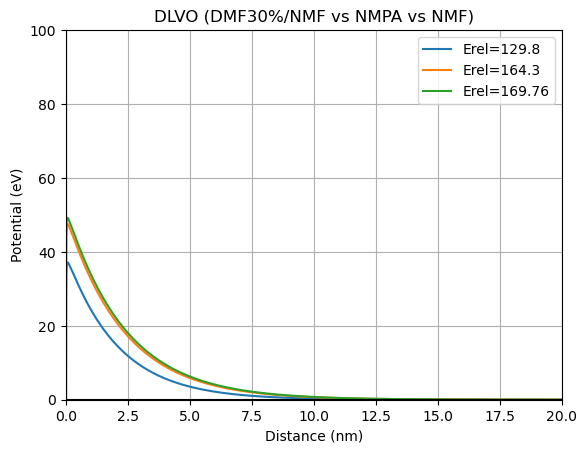

[0.48328805231367405, 0.42956078098929434, 0.4225963305842514]
The B2 Coefficient for Erel=129.8 is: 1.351353990125731
The b2 Coefficient for Erel=129.8 is: 17.286737027027588
The B2 Coefficient for Erel=164.3 is: 2.017934540502568
The b2 Coefficient for Erel=164.3 is: 25.813742360858424
The B2 Coefficient for Erel=169.76 is: 2.1335213567341373
The b2 Coefficient for Erel=169.76 is: 27.292347456626555


C:\Users\Youss\AppData\Local\Temp\ipykernel_1880\2711085395.py:59: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  B2_result, _ = integrate.quad(integrand, .01, np.inf, args=(Erel,))


In [42]:
# Graph 3, PbS Sn2S6, 7.2nm concentration 10mg/ml, in 3/7(DMF/NMF), NMPA, NMF
pi = np.pi
kb = 8.617E-5  # Boltzmann constant
A = 0.311 #Hamaker Constant
T = 298  # 25C
I = 0.0430223
R = 3.6
k_values = []

# Calculating the Net potential function
def calc_totPotential(r, Erel):
    # Distribution Potential
    disPotential = (-A / (6*r))*(R/2) 

    # Electrostatic Potential
    k = ((0.055263 * Erel * kb * T) / I)**(-1/2)
    y = 1
    k_values.append(k)    
    esPotential = (((32.0 * pi * kb * T * R * y**2) / (k**2)) * np.exp(-k * r))
    totPotential = disPotential + esPotential 
    return totPotential

Erel_values = np.array([129.8, 164.3, 169.76])  # Array of Erel values
r = np.concatenate((np.linspace(.000001, .1, 500, endpoint=False), np.linspace(.1, 100, 500)))

# Plotting the DLVO graph
for Erel in Erel_values:
    net_potentials = calc_totPotential(r, Erel)
    plt.plot(r, net_potentials, label=f'Erel={Erel}')
    
    # Create a NumPy array with the r values and corresponding potential energy values
    data = np.array([r, net_potentials])
    # Transpose the array so that each row corresponds to a different r value
    data = np.transpose(data)
    # Save the array to a CSV file
    np.savetxt(f'Graph3_Erel_{Erel}.csv', data, delimiter=',')


plt.xlabel('Distance (nm)')
plt.ylabel('Potential (eV)')
plt.title('DLVO (DMF30%/NMF vs NMPA vs NMF)')
plt.axhline(0, color='black', linewidth=1.5)
plt.axvline(0, color='black', linewidth=1.5)
plt.grid(True)
plt.ylim(0, 100)
plt.xlim(0, 20)
plt.legend()
plt.show()

# Integration for B2 and b2
def integrand(r, Erel):
    return ((-2*np.pi*(np.exp(-calc_totPotential(r, Erel)/(kb*T))-1))*r**2)

B2 = []
b2 = []

print (k_values)
for Erel in Erel_values:
    B2_result, _ = integrate.quad(integrand, .01, np.inf, args=(Erel,))
    B2.append(B2_result/10000)
    print(f"The B2 Coefficient for Erel={Erel} is: {B2_result/10000}")
    b2_result = (B2_result*3)/(16*np.pi*R**3)
    b2.append(b2_result)
    print(f"The b2 Coefficient for Erel={Erel} is: {b2_result}")

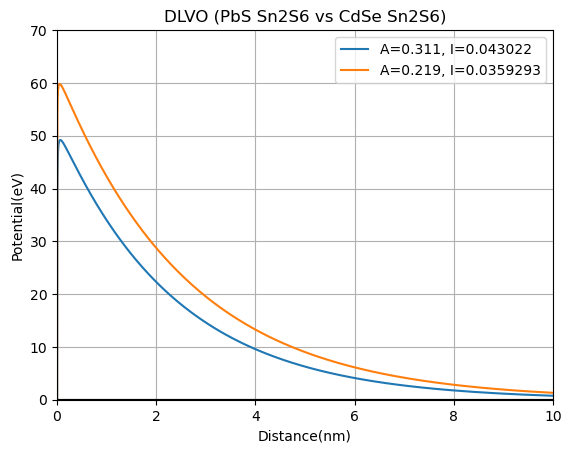

[0.4225948571725534, 0.3861920129042228]
The B2 Coefficient for A=0.311, I=0.043022 is: 2.133546728517873
The b2 Coefficient for A=0.311, I=0.043022 is: 27.292672016554263
The B2 Coefficient for A=0.219, I=0.0359293 is: 2.7147305768218515
The b2 Coefficient for A=0.219, I=0.0359293 is: 34.7272690380586


C:\Users\Youss\AppData\Local\Temp\ipykernel_1880\2587146311.py:59: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  B2_result, _ = integrate.quad(integrand, .01, np.inf, args=(A, I))


In [41]:
# Graph 4 7.2nm QD, concentration 10mg/mL in NMF, PbS Sn2S6 vs CdSe Sn2S6
pi = np.pi
kb = 8.617E-5  # Boltzmann constant
R = 3.6
T = 298 #25C
Erel = 169.76 #NMF
k_values = []

#Calculating the Net potential function
def calc_totPotential(r, A, I):
    # Distribution Potential (I hope)
    disPotential = (-A / (6*r))*(R/2) 

    # Electrostatic Potential
    k = (((.055263*Erel*kb*T)/(I))**(-1/2))
    y = 1
    k_values.append(k)
    esPotential = (((32.0 * pi * kb * T * R * y**2) / (k**2)) * np.exp(-k * r))
    totPotential = disPotential + esPotential
    return totPotential

A_values = np.array([0.311, .219])  # Array of A values
I_values = np.array([0.043022, 0.0359293])  # Array of I values
r =np.concatenate((np.logspace(-6, -1, 500, endpoint=False), np.logspace(-1, 3, 500)))

for A, I in zip(A_values, I_values):
    net_potentials = calc_totPotential(r, A, I)
    plt.plot(r, net_potentials, label=f'A={A}, I={I}')
    
    # Create a NumPy array with the r values and corresponding potential energy values
    data = np.array([r, net_potentials])
    # Transpose the array so that each row corresponds to a different r value
    data = np.transpose(data)
    # Save the array to a CSV file
    np.savetxt(f'Graph4_A_{A}_I_{I}.csv', data, delimiter=',')


# Plotting the DLVO graph
plt.xlabel('Distance(nm)')
plt.ylabel('Potential(eV)')
plt.title('DLVO (PbS Sn2S6 vs CdSe Sn2S6)')
plt.axhline(0, color='black', linewidth=1.5)
plt.axhline(0, color='black', linewidth=1.5)
plt.ylim(0, 70)
plt.xlim(0, 10)
plt.grid(True)
plt.legend()
plt.show()

# Integration for B2 and b2
def integrand(r, A, I):
    return ((-2 * np.pi * (np.exp(-calc_totPotential(r, A, I) / (kb * T)) - 1)) * r ** 2)

B2 = []
b2 = []

print (k_values)
for i, (A, I) in enumerate(zip(A_values, I_values)):
    B2_result, _ = integrate.quad(integrand, .01, np.inf, args=(A, I))
    B2.append(B2_result/10000)
    print(f"The B2 Coefficient for A={A}, I={I} is: {B2_result / 10000}")

    b2_result = (B2_result * 3) / (16 * np.pi * R ** 3)
    b2.append(b2_result)
    print(f"The b2 Coefficient for A={A}, I={I} is: {b2_result}")


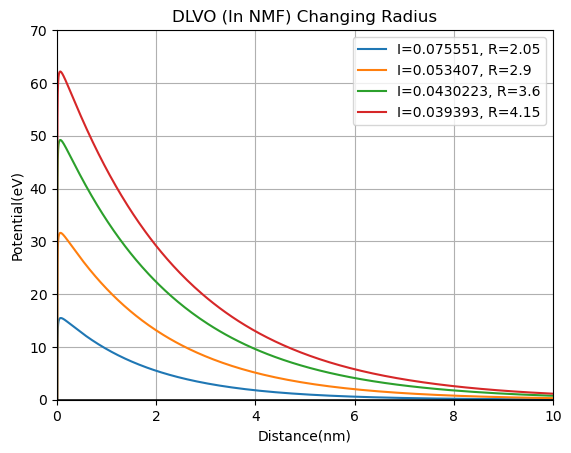

[0.5600141726335062, 0.47084504152192014, 0.4225963305842514, 0.40437885442023147]
The B2 Coefficient for I=0.075551, R=2.05 is: 0.5838661038330611
The b2 Coefficient for I=0.075551, R=2.05 is: 40.448561336386966
The B2 Coefficient for I=0.053407, R=2.9 is: 1.3038682886690822
The b2 Coefficient for I=0.053407, R=2.9 is: 31.9073788309978
The B2 Coefficient for I=0.0430223, R=3.6 is: 2.1335213567341373
The b2 Coefficient for I=0.0430223, R=3.6 is: 27.292347456626555
The B2 Coefficient for I=0.039393, R=4.15 is: 2.682228692138834
The b2 Coefficient for I=0.039393, R=4.15 is: 22.397673689160733


C:\Users\Youss\AppData\Local\Temp\ipykernel_14112\3337679920.py:57: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  B2_result, _ = (integrate.quad(integrand, .01, np.inf, args=(I, R)))


In [5]:
# Graph 5 PbS Sn2S6 in NMF, concentration 10mg/mL, sizes; 4.1nm, 5.8nm, 7.2nm, 8.3nm
pi = np.pi
kb = 8.617E-5  # Boltzmann constant
A = .311 # Hamaker Constant
T = 298 #25C
Erel = 169.76#NMF
k_values = []

def calc_totPotential(r, I, R):
    # Distribution Potential (I hope)
    disPotential = (-A / (6*r))*(R/2)

    # Electrostatic Potential
    k = (((.055263*Erel*kb*T)/(I))**(-1/2))
    y = 1
    esPotential = (((32.0 * pi * kb * T * R * y**2) / (k**2)) * np.exp(-k * r))
    k_values.append(k)
    totPotential = disPotential + esPotential
    return totPotential

I_values = np.array([0.075551, 0.053407, 0.0430223, 0.039393])  # Array of I values
R_values = np.array([2.05, 2.9, 3.6, 4.15])  # Array of R values
r =np.concatenate((np.logspace(-3, -1, 500, endpoint=False), np.logspace(-1, 3, 500)))

for I, R in zip(I_values, R_values):
    net_potentials = calc_totPotential(r, I, R)
    plt.plot(r, net_potentials, label=f'I={I}, R={R}')
    
    # Create a NumPy array with the r values and corresponding potential energy values
    data = np.array([r, net_potentials])
    # Transpose the array so that each row corresponds to a different r value
    data = np.transpose(data)
    # Save the array to a CSV file
    np.savetxt(f'Graph5_I_{I}_R_{R}.csv', data, delimiter=',')

# Plotting the DLVO graph
plt.xlabel('Distance(nm)')
plt.ylabel('Potential(eV)')
plt.title('DLVO (In NMF) Changing Radius')
plt.axhline(0, color='black', linewidth=1.1)
plt.axvline(0, color='black', linewidth=1.1)
plt.ylim(0, 70)
plt.xlim(0, 10)
plt.legend()
plt.grid(True)
plt.show()

#Integration
def integrand(r, I, R):
    return (-2 * np.pi * (np.exp(-calc_totPotential(r, I, R) / (kb * T)) - 1)* r ** 2)

B2 = []
b2 = []

print (k_values)
for i, (I, R) in enumerate(zip(I_values, R_values)):
    B2_result, _ = (integrate.quad(integrand, .01, np.inf, args=(I, R))) 
    B2.append(B2_result/10000)
    print(f"The B2 Coefficient for I={I}, R={R} is: {B2_result / 10000}")

    b2_result = (B2_result * 3) / (16 * np.pi * R ** 3)
    b2.append(b2_result)
    print(f"The b2 Coefficient for I={I}, R={R} is: {b2_result}")



In [4]:
#Calculating the Ionic Strength
diameter = input('Input the diameter of the QD in nm:')
gd = input('Input the grafting density of the ligand in nm^-2: ')
molarM = input('Input the molar mass of the particle in g/mol: ')
density = input('Input the density of the molecule in g/cm^3: ')
mgPerml = input('Input the concentration of the sample in mg/mL: ')
radius = float(diameter)/2
gd = float(gd)
molarM = float(molarM)
density = float(density)
mgPerml = float(mgPerml)
Na = 6.022E23

molarity = mgPerml/molarM
numLig = (4*np.pi*radius**2)/gd
volQDnm = (4*np.pi*radius**3)/3
volMolnm = (molarM*1.66E-3)/(density)
PartPerQD = volQDnm/volMolnm
M_Ligands = (molarity*numLig)/(PartPerQD)
I = M_Ligands * 3 + M_Ligands *4

print('\nThe ligand molarity is:', M_Ligands)
print('The ionic strength is: ', I)

Input the diameter of the QD in nm: 5
Input the grafting density of the ligand in nm^-2:  5.2
Input the molar mass of the particle in g/mol:  196.96
Input the density of the molecule in g/cm^3:  19.3
Input the concentration of the sample in mg/mL:  250



The ligand molarity is: 0.004962136309286568
The ionic strength is:  0.03473495416500598


# 